In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tqdm import trange
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [3]:
train = pd.read_csv("training_data_final.csv")
test = pd.read_csv("test_data_final.csv")

In [4]:
train.head()


,Unnamed: 0,urlDrugName,condition,rating,ReviewSentiment,sideEff_num,SideEffectsSentiment,eff_num,BenefitsSentiment,full_commentSentiment
0,1,enalapril,management of congestive heart failure,4,3.333333,8,0.0,10,5.000000,2.000000
1,2,ortho-tri-cyclen,birth prevention,1,5.000000,4,7.5,10,7.500000,6.666667
2,3,ponstel,menstrual cramps,10,6.000000,10,0.0,10,4.000000,4.545455
3,4,prilosec,acid reflux,3,5.700265,8,0.0,4,3.333333,2.500000
4,5,lyrica,fibromyalgia,2,5.700265,4,0.0,4,5.000000,2.500000


In [5]:
test.head()

,Unnamed: 0,urlDrugName,condition,rating,ReviewSentiment,sideEff_num,SideEffectsSentiment,eff_num,BenefitsSentiment,full_commentSentiment
0,1,biaxin,sinus infection,9,5.000000,8,0.000000,8,0.000000,1.666667
1,2,lamictal,bipolar disorder,9,5.000000,8,4.000000,10,6.153846,4.800000
2,3,depakene,bipolar disorder,4,2.941176,4,3.750000,6,6.666667,4.242424
3,4,sarafem,bi-polar / anxiety,10,10.000000,10,3.502362,10,5.000000,6.666667
4,5,accutane,nodular acne,10,10.000000,8,10.000000,10,6.666667,8.333333


In [6]:
le = preprocessing.LabelEncoder() #transforming string conditions to numeric ones

In [7]:
le2 = preprocessing.LabelEncoder()

In [8]:
train['condition'] = train['condition'].astype(str)

In [9]:
test['condition'] = test['condition'].astype(str)

In [10]:
le.fit(train['condition']) 

LabelEncoder()

In [11]:
le2.fit(test['condition'])

LabelEncoder()

In [12]:
train['condition'] = le.transform(train['condition']) 

In [13]:
test['condition'] = le2.transform(test['condition']) 

In [14]:
X = train[["SideEffectsSentiment", "BenefitsSentiment", "ReviewSentiment", "full_commentSentiment", 'condition']]
Y = train["rating"] 
X_test = test[["SideEffectsSentiment", "BenefitsSentiment", "ReviewSentiment", "full_commentSentiment", 'condition']]
Y_test = test["rating"] 

# Decision tree regressor

In [15]:
best_score = np.inf
parameters = {} 

In [16]:
from sklearn.tree import DecisionTreeRegressor

for depth in range (1,11):
    for min_split in range(2,21):
        for min_leaf in range(1,21):
            regressor = DecisionTreeRegressor(max_depth = depth,
                                              min_samples_split = min_split,
                                              min_samples_leaf = min_leaf)
            scores = cross_val_score(regressor, X, Y, cv = 5)
            if scores.mean() < 0:
                pass
            elif scores.mean() < best_score:
                print("New best parameters!")
                parameters["best_depth"] = depth
                parameters["best_min_split"] = min_split             
                parameters["best_min_leaf"] = min_leaf
                best_score = scores.mean()

New best parameters!
New best parameters!
New best parameters!
New best parameters!


In [17]:
regressor_tree = DecisionTreeRegressor(max_depth = parameters["best_depth"],
                                  min_samples_split = parameters["best_min_split"],
                                  min_samples_leaf = parameters["best_min_leaf"])

In [22]:
regressor_tree.fit(X = X, y = Y)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=9,
           min_samples_split=11, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [23]:
prediction_tree = regressor_tree.predict(X_test)

In [24]:
results = pd.DataFrame({"y_true":Y_test, "y_pred": prediction_tree})

In [26]:
def rmsle(y_pred, y_true) :
    assert len(y_true) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_true))**2))

In [27]:
rmsle(y_pred=prediction_tree, y_true=Y_test)

0.5672451739558482

# Random Forest regressor

In [28]:
regressor = RandomForestRegressor()


In [29]:
regressor.fit(X = X, y = Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [30]:
prediction = regressor.predict(X_test)

In [31]:
results = pd.DataFrame({"y_true":Y_test, "y_pred": prediction})

In [32]:
results

,y_pred,y_true
0,3.400000,9
1,4.500000,9
2,7.200000,4
3,8.100000,10
4,7.200000,10
5,6.300000,2
6,3.700000,8
7,7.800000,10
8,4.500000,10
9,8.100000,1


In [33]:
rmsle(y_pred=prediction, y_true=Y_test)


0.563265672549523

# TPOT Regressor

In [34]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2)

In [35]:
tpot.fit(X, Y)

Optimization Progress:  33%|███▎      | 100/300 [02:04<09:51,  2.96s/pipeline]

Generation 1 - Current best internal CV score: -7.5807112804880195


Optimization Progress:  50%|█████     | 150/300 [03:55<02:32,  1.02s/pipeline]

Generation 2 - Current best internal CV score: -7.558544662802485


Optimization Progress:  67%|██████▋   | 200/300 [06:08<04:43,  2.83s/pipeline]

Generation 3 - Current best internal CV score: -7.558544662802485


Optimization Progress:  83%|████████▎ | 250/300 [08:10<02:22,  2.86s/pipeline]

Generation 4 - Current best internal CV score: -7.558544662802485


Generation 5 - Current best internal CV score: -7.558544662802485

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.55, min_samples_leaf=11, min_samples_split=2, n_estimators=100)


TPOTRegressor(config_dict={'sklearn.linear_model.ElasticNetCV': {'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]), 'tol': [1e-05, 0.0001, 0.001, 0.01, 0.1]}, 'sklearn.ensemble.ExtraTreesRegressor': {'n_estimato....3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])}}}},
       crossover_rate=0.1, cv=5, disable_update_check=False,
       early_stop=None, generations=5, max_eval_time_mins=5,
       max_time_mins=None, memory=None, mutation_rate=0.9, n_jobs=1,
       offspring_size=50, periodic_checkpoint_folder=None,
       population_size=50, random_state=None, scoring=None, subsample=1.0,
       verbosity=2, warm_start=False)

In [36]:
print(tpot.score(X, Y))


-6.13812251904607


In [37]:
tpot.export('tpot_pipeline.py')


True

In [38]:
prediction2 = tpot.predict(X_test)

In [39]:
results2 = pd.DataFrame({"y_true":Y_test, "y_pred": prediction2})

In [40]:
results2

,y_pred,y_true
0,5.891171,9
1,6.596388,9
2,6.653877,4
3,7.366649,10
4,7.743116,10
5,7.520429,2
6,5.782957,8
7,7.960372,10
8,6.580420,10
9,7.261430,1


In [41]:
rmsle(y_pred=prediction2, y_true=Y_test)  #best RMSLE so far


0.5320899024660284

In [42]:
test_tobind = pd.read_csv("test_data_final.csv")

In [43]:
shiny_data = pd.concat([test_tobind.reset_index(), results2], axis=1)

In [44]:
shiny_data.head()

,index,Unnamed: 0,urlDrugName,condition,rating,ReviewSentiment,sideEff_num,SideEffectsSentiment,eff_num,BenefitsSentiment,full_commentSentiment,y_pred,y_true
0,0,1,biaxin,sinus infection,9,5.000000,8,0.000000,8,0.000000,1.666667,5.891171,9
1,1,2,lamictal,bipolar disorder,9,5.000000,8,4.000000,10,6.153846,4.800000,6.596388,9
2,2,3,depakene,bipolar disorder,4,2.941176,4,3.750000,6,6.666667,4.242424,6.653877,4
3,3,4,sarafem,bi-polar / anxiety,10,10.000000,10,3.502362,10,5.000000,6.666667,7.366649,10
4,4,5,accutane,nodular acne,10,10.000000,8,10.000000,10,6.666667,8.333333,7.743116,10


In [45]:
shiny_data.to_csv('shiny_data.csv', header='column_names') 

# TPOT classifier

In [46]:
from tpot import TPOTClassifier
tpot2 = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)

In [ ]:
tpot2.fit(X, Y)

In [48]:
tpot2

TPOTClassifier(config_dict={'sklearn.naive_bayes.GaussianNB': {}, 'sklearn.naive_bayes.BernoulliNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.naive_bayes.MultinomialNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.tree.DecisionT....3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])}}}},
        crossover_rate=0.1, cv=5, disable_update_check=False,
        early_stop=None, generations=5, max_eval_time_mins=5,
        max_time_mins=None, memory=None, mutation_rate=0.9, n_jobs=1,
        offspring_size=50, periodic_checkpoint_folder=None,
        population_size=50, random_state=42, scoring=None, subsample=1.0,
        verbosity=2, warm_start=False)

In [49]:
prediction3 = tpot2.predict(X_test)

In [50]:
results3 = pd.DataFrame({"y_true":Y_test, "y_pred": prediction3})

In [51]:
results3

,y_pred,y_true
0,8,9
1,10,9
2,10,4
3,10,10
4,10,10
5,10,2
6,8,8
7,7,10
8,8,10
9,8,1


In [52]:
rmsle(y_pred=prediction3, y_true=Y_test)



0.6476911898320622

In [53]:
accuracy_score(y_true=Y_test, y_pred=prediction3) #acc


0.22297297297297297

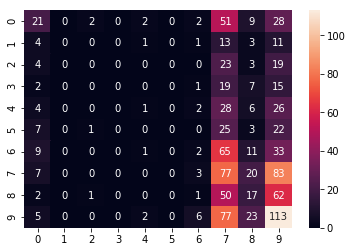

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix  

sns.heatmap(confusion_matrix(y_true = Y_test, y_pred = prediction3), annot = True, fmt="d")